## Rapport om iris

I den här rapporten dyker vi in i sambandet mellan petal- och sepallängder hos Iris-blomman och sätter särskild fokus på längderna. Även om datasetet även inkluderar breddinformation, kommer vi huvudsakligen att rikta vår uppmärksamhet mot längdmätningarna. Vi utforskar hur väl vi kan förutse sepallängden baserat på petallängden genom att gräva djupt i dessa mätningar och använda linjär regression. För att göra det hela mer begripligt använder vi visuella hjälpmedel som scatter plots och linjära regressioner för att lyfta fram mönster och osäkerheter i våra gissningar.



In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as scs 
import seaborn as sns 
from scipy.stats import norm
from statsmodels.formula.api import ols

filepath = "../Dataset/iris.csv"
iris = pd.read_csv(filepath)
iris = iris.dropna()
iris.columns = iris.columns.str.strip()
# Select only numeric columns
numeric_columns = iris.select_dtypes(include=[np.number])
# make a separate data-frame for length
length_data = iris[['sepal_length', 'petal_length']]



## Översikt av iris dataset


speal length μ = 5.843333, σ = 0.828066

petal length μ = 3.758667, σ = 1.764420



In [89]:
length_description = length_data.describe()

print(length_description)

       sepal_length  petal_length
count    150.000000    150.000000
mean       5.843333      3.758667
std        0.828066      1.764420
min        4.300000      1.000000
25%        5.100000      1.600000
50%        5.800000      4.350000
75%        6.400000      5.100000
max        7.900000      6.900000


In [37]:
mean_values = length_data.mean().values
median_values = length_data.median().values
std_dev_values = length_data.std().values


print(f"Mean values:\n{mean_values}\n")
print(f"Median values:\n{median_values}\n")
print(f"Standard deviation values:\n{std_dev_values}\n")


Mean values:
[5.84333333 3.75866667]

Median values:
[5.8  4.35]

Standard deviation values:
[0.82806613 1.76442042]



### Kondifidentsintervall för sepal 

In [35]:
confidence_level = 0.95
sepal_length_ci = scs.t.interval(
    confidence_level,
    len(numeric_columns['sepal_length']) - 1,
    loc=numeric_columns['sepal_length'].mean(),
    scale=numeric_columns['sepal_length'].std()
)
print(f"mean value is with 95% confidence level, between : {sepal_length_ci}")

mean value is with 95% confidence level, between : (4.207063752459323, 7.479602914207344)


### Beräknar kondfientsintervall för petal 

In [36]:
confidence_level = 0.95
petal_length_ci = scs.t.interval(
    confidence_level,
    len(numeric_columns['petal_length']) - 1,
    loc=numeric_columns['petal_length'].mean(),
    scale=numeric_columns['petal_length'].std()
)
print(f"mean value is with 95% confidence level, between : {sepal_length_ci}")

mean value is with 95% confidence level, between : (0.27214866587480646, 7.245184667458526)



### Normalfördelning för Sepal- och Petallängder
I denna graf får vi normalfördelningar för sepal- och petallängder baserat på medelvärde och standardavvikelse från Iris dataset.

Sepallängdsfördelning: Den blå kurvan representerar normalfördelningen för sepal längd, centrerad kring ett medelvärde på cirka 5.84 med en standardavvikelse på 0.83.

Petallängdsfördelning: Den orangea kurvan representerar normalfördelningen för petallängd, centrerad kring ett medelvärde på cirka 3.76 med en standardavvikelse på 1.76.

Sepallängd och petallängd uppvisar olika fördelningar, där sepal längd är mer koncentrerad kring sitt medelvärde jämfört med petallängd.
Petallängd visar större variabilitet, vilket framgår av dess bredare fördelning.


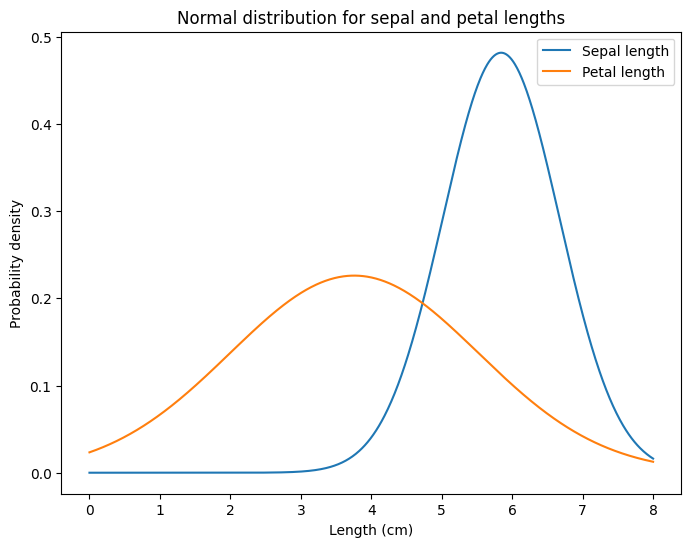

In [80]:
# Generate x values
x = np.linspace(0, 8, 1000)

# Generate normal distributions for sepal length and petal length ( mu = 5.843333, sigma = 0.828066 )
sepal_length_mean, sepal_length_std = 5.843333, 0.828066
sepal_length_pdf = norm.pdf(x, loc=sepal_length_mean, scale=sepal_length_std)

petal_length_mean, petal_length_std = 3.758667, 1.764420
petal_length_pdf = norm.pdf(x, loc=petal_length_mean, scale=petal_length_std)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, sepal_length_pdf, label='Sepal length')
ax.plot(x, petal_length_pdf, label='Petal length')

plt.title('Normal distribution for sepal and petal lengths')
plt.xlabel('Length (cm)')
plt.ylabel('Probability density')
plt.legend()
plt.show()


### Kernel Density Estimation (KDE) för Sepallängd med Olika Stickprovsstorlekar
I denna graf utförde vi Kernel Density Estimation (KDE) för medelvärdena av sepal längd, med olika stickprovsstorlekar (n) dragna från Iris dataset. 

Dessa visualiseringar ger insyn om sepal- och petallängder i Iris dataset, samt beteendet hos medelvärdena för stickprover när stickprovsstorlekarna varierar.

KDE-kurvor: Varje kurva representerar KDE för medelvärdena av stickproven för en specifik stickprovsstorlek (n), som sträcker sig från 2 till 50.

När stickprovsstorleken ökar blir KDE smalare och mer spetsig, vilket indikerar att fördelningen av medelvärden konvergerar mot populationsmedelvärdet.
Mindre stickprovsstorlekar resulterar i bredare och mer variabla KDE-kurvor, vilket återspeglar den ökade osäkerheten för mindre stickprov.



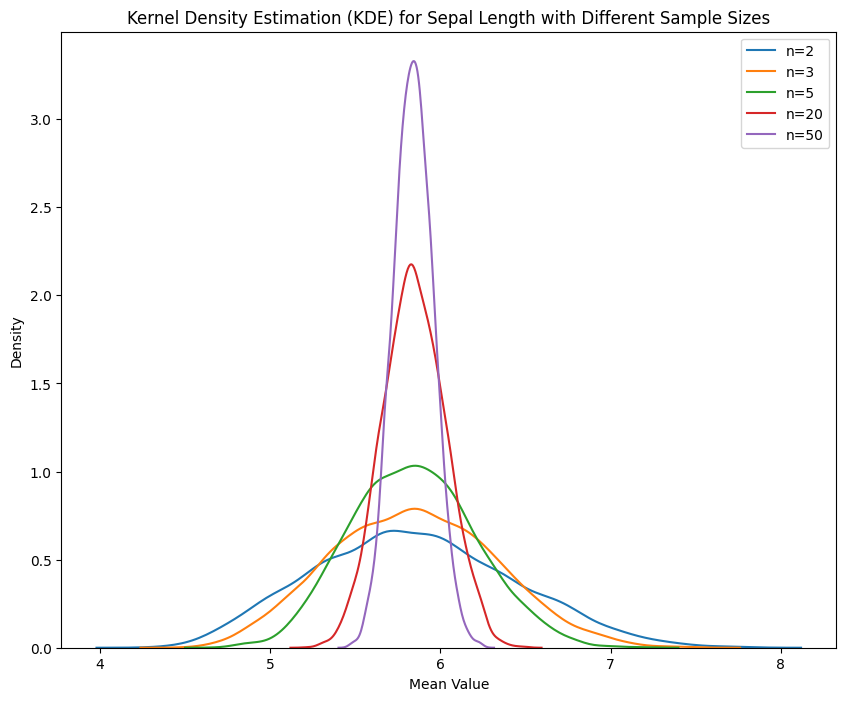

In [72]:


iter = 5000
means = np.zeros(iter)
n_list = [2, 3, 5, 20, 50]


fig, ax = plt.subplots(figsize=(10, 8))


for n in n_list:
    
    
    for i in range(iter):
        # Randomly sample n values from sepal length of Iris dataset
        sampled_values = iris['sepal_length'].sample(n, replace=True)
        mean = sampled_values.mean()
        means[i] = mean
    
    
    sns.kdeplot(means, label=f'n={n}', ax=ax)


ax.legend()
ax.set_title('Kernel Density Estimation (KDE) for Sepal Length with Different Sample Sizes')
ax.set_xlabel('Mean Value')
ax.set_ylabel('Density')
plt.show()


Kollar specifik medalvärde (μ) för klassen iris-setosa

In [96]:
setosa = iris[iris['class'] == 'Iris-setosa']  
mean_sepal_length_setosa = setosa['sepal_length'].mean()  

print('Mean sepal length for Setosa:', mean_sepal_length_setosa,'cm')


Mean sepal length for Setosa: 5.006 cm


## Hypotestest
Undersöker om iris setosa sepal lägnd siljer sig från de andra iris speal längd
medelvärde för hela populationen = 5.843333

Vi börjar med att bestämma alternativhypotesen som:<br>
    $H_A: \mu \neq 5.843333\,cm$<br>
Och sedan nollhypotesen som dess komplement:<br>
    $H_0: \mu = 5.843333\,cm$

Undersöknigen ska kolla om det stämmer överens med ett spcifik värde, vilket betyder att testet kommer göras dubbelsidig. 
Med hjälp av den inbyggda funktionen i scipy (ttest_1samp) kan vi få fram t-test, p-värde och med alternative='two sided' för att få en dubbelsidig test.

In [38]:
from scipy.stats import t

setosa = iris[iris['class'] == 'Iris-setosa']  
sample = setosa['sepal_length']  

xbar = sample.mean()  # Calculate sample mean
mu = 5.843333  # Set mu to the value for the null hypothesis
std = sample.std(ddof=1)  
n = len(sample)  # Calculate the sample size

statistic = (xbar - mu) / (std / np.sqrt(n))  # Calculate the value of the test statistic
print('Test statistic:', statistic)  

p_value = 2 * (1 - t.cdf(x=np.abs(statistic), df=n - 1))  # Calculate the two-sided p-value
print('p-value:', p_value)  


Test statistic: -16.797196170245318
p-value: 0.0


Det observerade teststatistiska värdet är -16.80, och p-värdet är noll. Vid en signifikansnivå på 0.05 förkastas nollhypotesen. Detta indikerar att det finns tillräckligt med bevis för att påstå att medelvärdet för sepallängden för Iris-setosa skiljer sig från det förväntade medelvärdet 5.843333 cm.

Vi förkastar nollhypotesen ($H_0$) till förmån för alternativhypotesen ($H_A$). Det finns statistiskt signifikanta bevis för att medelvärdet för sepallängden för Iris-setosa inte är lika med 5.843333 cm.

### Hur datan ser ut i en bild

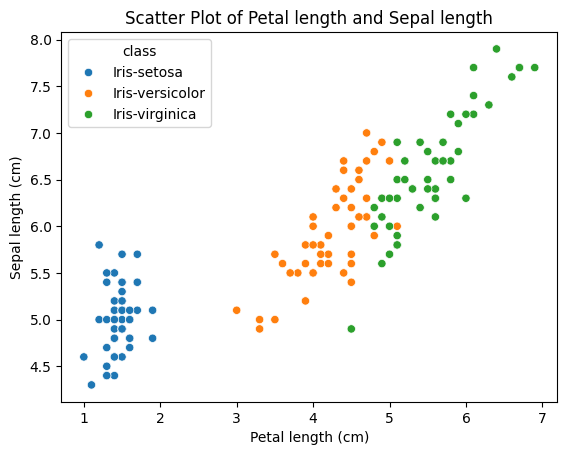

In [81]:
sns.scatterplot(data=iris, x='petal_length', y='sepal_length', hue='class')
plt.title('Scatter Plot of Petal length and Sepal length')
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.show()

In [85]:
model = ols('sepal_length ~ petal_length', data=iris).fit()
ypred = model.predict(iris['petal_length'])


### En översiktlig bild av sambandet mellan petallängd och sepallängd samt hur väl den linjära modellen passar datan.

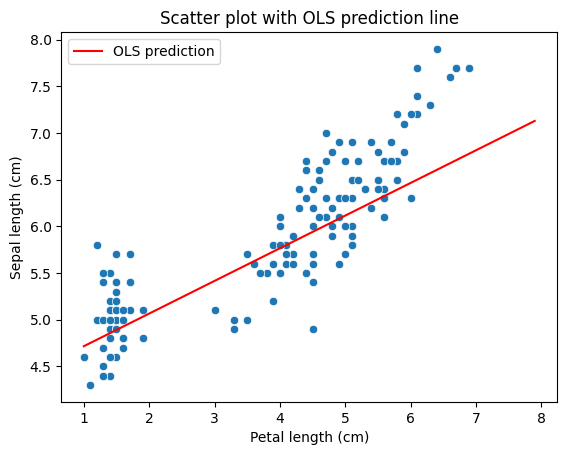

In [87]:
scatterplot = sns.scatterplot(data=iris, x='petal_length', y='sepal_length')

scatterplot.plot([iris['petal_length'].min(), iris['sepal_length'].max()],
                  [ypred.min(), ypred.max()],
                  "r", label="OLS prediction")
scatterplot.legend(loc="best")
plt.title('Scatter plot with OLS prediction line')
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.show()

### Genom att jämföra de faktiska datapunkterna med de förutsagda värdena kan vi få en översikt över hur väl modellen generaliserar till nya datapunkter, särskilt för de specifika petallängderna som valts.



0     8.396824
1    12.488083
2    24.761860
dtype: float64


Text(0, 0.5, 'Sepal length (cm)')

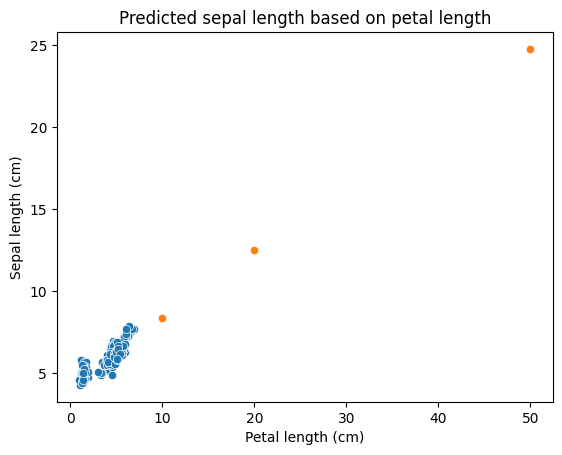

In [83]:
scatterplot = sns.scatterplot(data=iris, x='petal_length', y='sepal_length')

predictions = pd.DataFrame([10,20,50], columns=['petal_length'])
ypred = model.predict(predictions)
print(ypred)

predictions['pred'] = ypred
sns.scatterplot(data = predictions, x = 'petal_length',y = 'pred')

plt.title('Predicted sepal length based on petal length')
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')


In [70]:
predictions = model.get_prediction(iris['petal_length'])

frame=predictions.summary_frame(alpha=0.05)
ypred=frame['mean']

frame[['obs_ci_lower','obs_ci_upper']]

,obs_ci_lower,obs_ci_upper
0,4.066443,5.690240
1,4.066443,5.690240
2,4.025117,5.649742
3,4.107752,5.730756
4,4.066443,5.690240
...,...,...
145,5.624122,7.241919
146,5.542759,7.159631
147,5.624122,7.241919
148,5.705415,7.324275


### Denna visualisering ger en översikt över linjär regression och dess förmåga att gissa sepallängden baserat på petallängd. De röda streckade linjerna representerar det visuella prognosintervallet, vilket ger en uppfattning om osäkerheten i modellens gissningar.

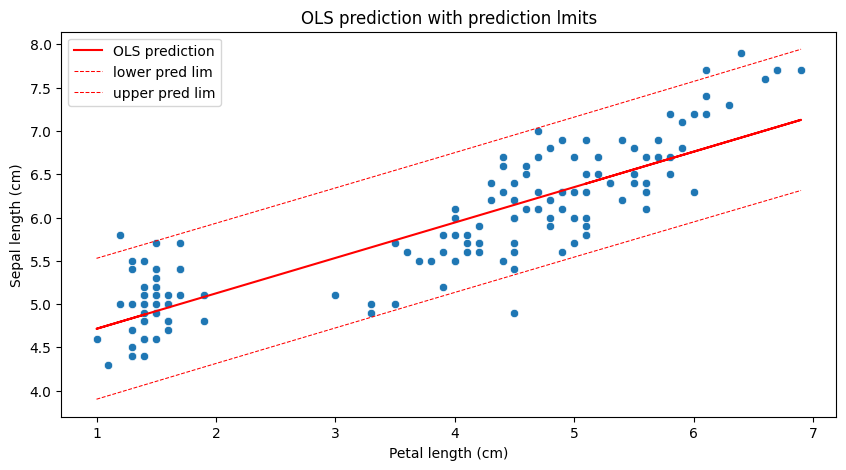

In [82]:
order = np.argsort(iris['petal_length'])
xs = np.array(iris['petal_length'])[order]
# ys = np.array(frame['obs_ci_lower'])[order]

fig, ax = plt.subplots(figsize=(10,5))

sns.scatterplot(data=iris, x='petal_length', y='sepal_length')
ax.plot(iris['petal_length'], ypred, "r", label="OLS prediction")

order = np.argsort(iris['petal_length'])
x = np.array(iris['petal_length'])[order]
lower = np.array(frame['obs_ci_lower'])[order]
upper = np.array(frame['obs_ci_upper'])[order]

ax.plot(xs, lower, 'r--', label="lower pred lim", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="upper pred lim", linewidth=0.75)


ax.legend(loc="best")
plt.title('OLS prediction with prediction lmits')
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.show()

### En helhetsbild av linjär regression, både för in-sample och out-of-sample data, och ger en indikation på modellens förmåga att generalisera till nya gissningar.

    petal_length
0       0.000000
1       2.083333
2       4.166667
3       6.250000
4       8.333333
5      10.416667
6      12.500000
7      14.583333
8      16.666667
9      18.750000
10     20.833333
11     22.916667
12     25.000000
13     27.083333
14     29.166667
15     31.250000
16     33.333333
17     35.416667
18     37.500000
19     39.583333
20     41.666667
21     43.750000
22     45.833333
23     47.916667
24     50.000000


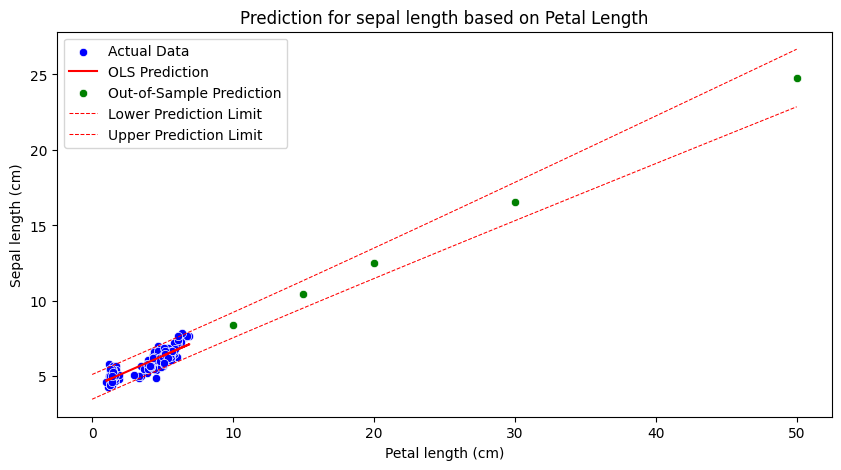

In [59]:
xs = pd.DataFrame(np.linspace(0, 50, 25), columns=['petal_length'])
print(xs)

predictions = model.get_prediction(xs)
frame = predictions.summary_frame(alpha=0.05)
lower = frame['obs_ci_lower']
upper = frame['obs_ci_upper']

fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(data=iris, x='petal_length', y='sepal_length', label='Actual Data', color='blue')
ax.plot(iris['petal_length'], ypred, "r", label="OLS Prediction")

predictions_oos = pd.DataFrame([10, 15, 20, 30, 50], columns=['petal_length'])
ypred_oos = model.predict(predictions_oos)
predictions_oos['pred'] = ypred_oos
sns.scatterplot(data=predictions_oos, x='petal_length', y='pred', label='Out-of-Sample Prediction', color='green')

ax.plot(xs, lower, 'r--', label="Lower Prediction Limit", linewidth=0.75)
ax.plot(xs, upper, 'r--', label="Upper Prediction Limit", linewidth=0.75)

ax.legend(loc="best")
plt.title('Prediction for sepal length based on Petal Length')
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.show()
